Get dataframe

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('../song_features.csv')
df.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genres
0,0HZk0QsXPhMNAWNDR3rYE8,0.4700,0.364,0.378,0.0,7,0.3390,-7.381,0,0.0331,89.918,3,0.366,a-cappella
1,6tkbKjaHRL2ZG5wtmHzXgn,0.7640,0.556,0.412,0.0,7,0.0902,-10.224,1,0.0992,84.778,4,0.811,a-cappella
2,4z8sz6E4YyFuEkv5o7IJni,0.3020,0.497,0.312,0.0,11,0.0968,-9.088,0,0.0269,105.036,4,0.177,a-cappella
3,6XamqE26MOlAoXs1LZr8AU,0.3080,0.674,0.517,0.0,2,0.0896,-7.147,1,0.0555,120.127,4,0.476,a-cappella
4,5glU2EWqa5hpYqGPboSNjV,0.0243,0.419,0.817,0.0,2,0.2510,-4.704,1,0.0468,78.107,4,0.317,a-cappella


Histogram

array([[<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'valence'}>]], dtype=object)

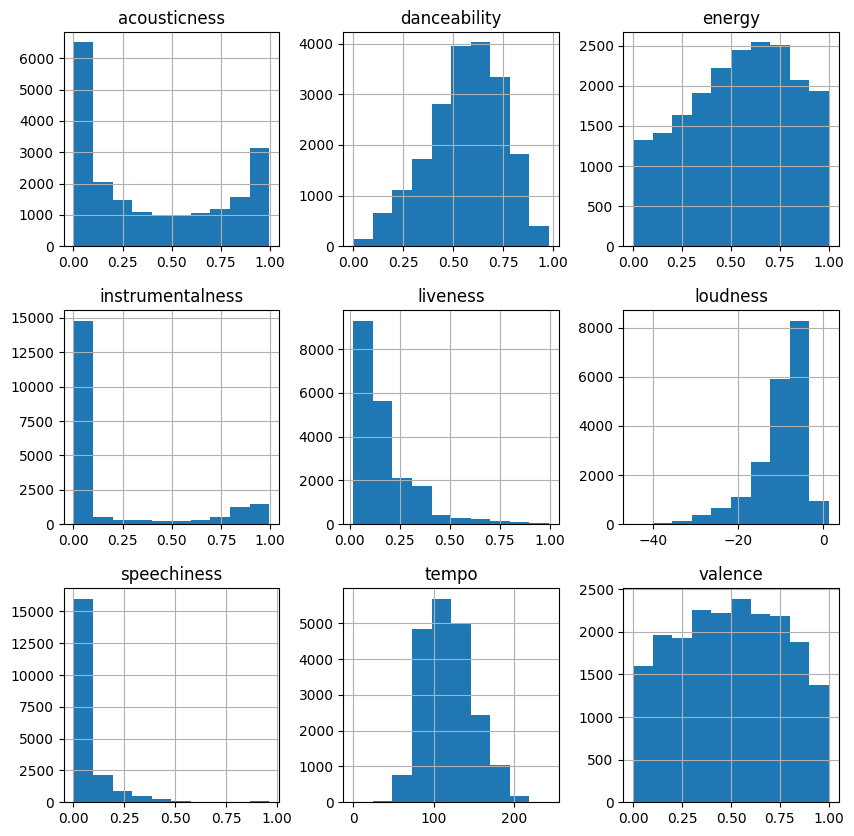

In [9]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df[features].hist(figsize=(10,10))

Heatmap

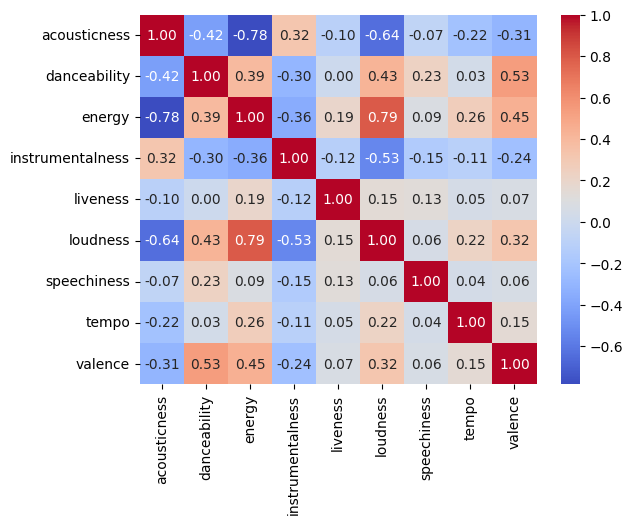

In [10]:
import seaborn as sns
dataplot = sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')

Box plot for features

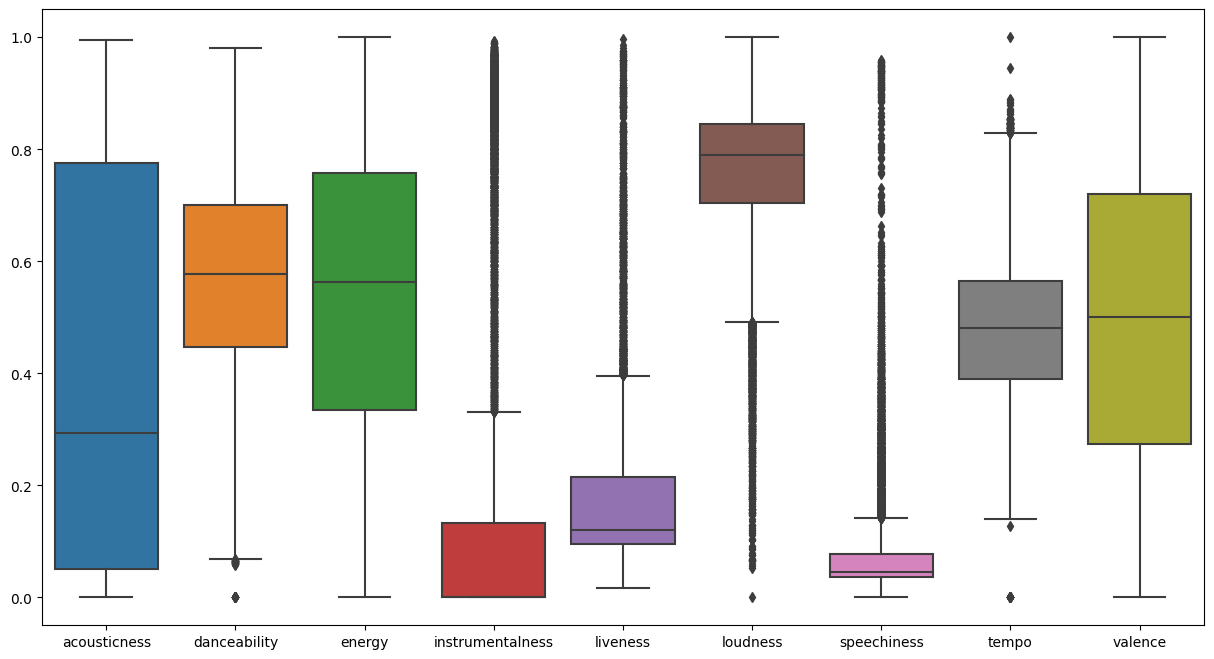

In [11]:

# Scale tempo and loudness to [0, 1]
for col in ['loudness', 'tempo']:
    df[col] = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))
sns.boxplot(data=df[features])
# Resize plot
plt.gcf().set_size_inches(15, 8)
plt.show()

Remove outliers

In [12]:
# Remove any data with tempo = 0
no_out_df = df[df['tempo'] != 0]
# Remove key, genres, id
no_out_df = no_out_df.drop(['key', 'id'], axis=1)
# # One hot encoding mode and time_signature
# no_out_df = pd.get_dummies(no_out_df, columns=['mode', 'time_signature'])
# # Rename time_signature columns
# no_out_df = no_out_df.rename(columns={'time_signature_0': 'ts_0/4', 'time_signature_1': 'ts_1/4', 'time_signature_3': 'ts_3/4', 'time_signature_4': 'ts_4/4', 'time_signature_5': 'ts_5/4'})
# Subset data to include only 500 songs per genre
sub_df = pd.DataFrame()
for genre in no_out_df['genres'].unique():
    sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
sub_df.drop(['genres'], axis=1, inplace=True)
sub_df.head()

/tmp/ipykernel_867/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp/ipykernel_867/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp/ipykernel_867/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp/ipykernel_867/3717558158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub_df = sub_df.append(no_out_df[no_out_df['genres'] == genre].sample(500))
/tmp/ipy

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
450,0.696,0.436,0.669,0.0,0.121,0.837733,0,0.1760,0.820883,4,0.861
10086,0.465,0.645,0.459,0.0,0.101,0.784981,1,0.0275,0.550367,4,0.156
10213,0.913,0.641,0.446,0.0,0.105,0.748021,0,0.3380,0.591021,4,0.143
10149,0.805,0.556,0.206,0.0,0.300,0.727935,1,0.0867,0.540342,1,0.238
226,0.433,0.604,0.512,0.0,0.337,0.861462,1,0.0868,0.322675,4,0.673


Clustering with Hierachical Clustering

In [13]:
import gower
from sklearn.cluster import AgglomerativeClustering
distance_matrix = gower.gower_matrix(sub_df)
distance_matrix

array([[0.        , 0.26794901, 0.17767198, ..., 0.21540445, 0.17933416,
        0.28051773],
       [0.26794901, 0.        , 0.17287153, ..., 0.12924126, 0.22287934,
        0.18116358],
       [0.17767198, 0.17287153, 0.        , ..., 0.20647712, 0.19918624,
        0.2636432 ],
       ...,
       [0.21540445, 0.12924126, 0.20647712, ..., 0.        , 0.2931971 ,
        0.11123683],
       [0.17933416, 0.22287934, 0.19918624, ..., 0.2931971 , 0.        ,
        0.2781321 ],
       [0.28051773, 0.18116358, 0.2636432 , ..., 0.11123683, 0.2781321 ,
        0.        ]], dtype=float32)

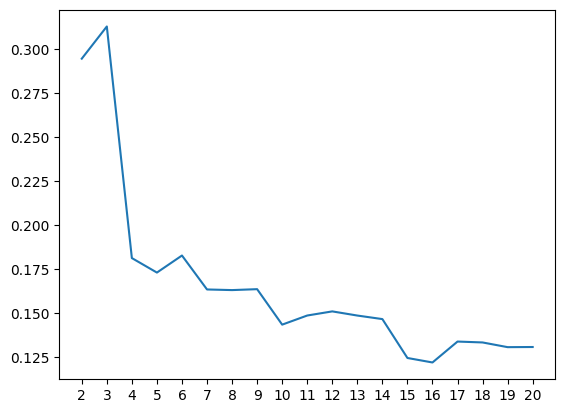

In [16]:
from sklearn.metrics import silhouette_score
# Find the best number of clusters by plotting a graph of silhouette score
scores = []
k_cand = range(2, 21)
for k in k_cand:
    model = AgglomerativeClustering(affinity='precomputed', linkage='complete', n_clusters=k)
    clusters = model.fit_predict(distance_matrix)
    score = silhouette_score(distance_matrix, clusters, metric='precomputed')
    scores.append(score)
plt.xticks(k_cand)
plt.plot(k_cand, scores)

In [18]:
model = AgglomerativeClustering(affinity='precomputed', linkage='complete', n_clusters=3)
clusters = model.fit_predict(distance_matrix)
sub_df['clusters'] = clusters
sub_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,clusters
450,0.696,0.436,0.669,0.0,0.121,0.837733,0,0.1760,0.820883,4,0.861,1
10086,0.465,0.645,0.459,0.0,0.101,0.784981,1,0.0275,0.550367,4,0.156,0
10213,0.913,0.641,0.446,0.0,0.105,0.748021,0,0.3380,0.591021,4,0.143,1
10149,0.805,0.556,0.206,0.0,0.300,0.727935,1,0.0867,0.540342,1,0.238,2
226,0.433,0.604,0.512,0.0,0.337,0.861462,1,0.0868,0.322675,4,0.673,0


Investigate the clusters

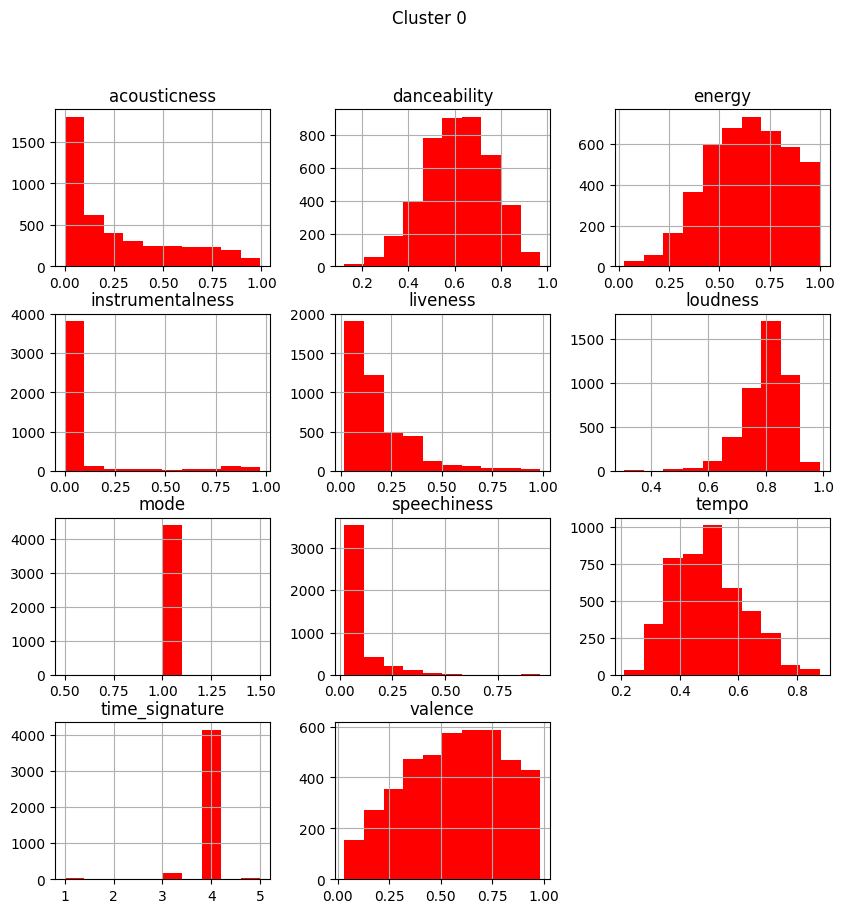

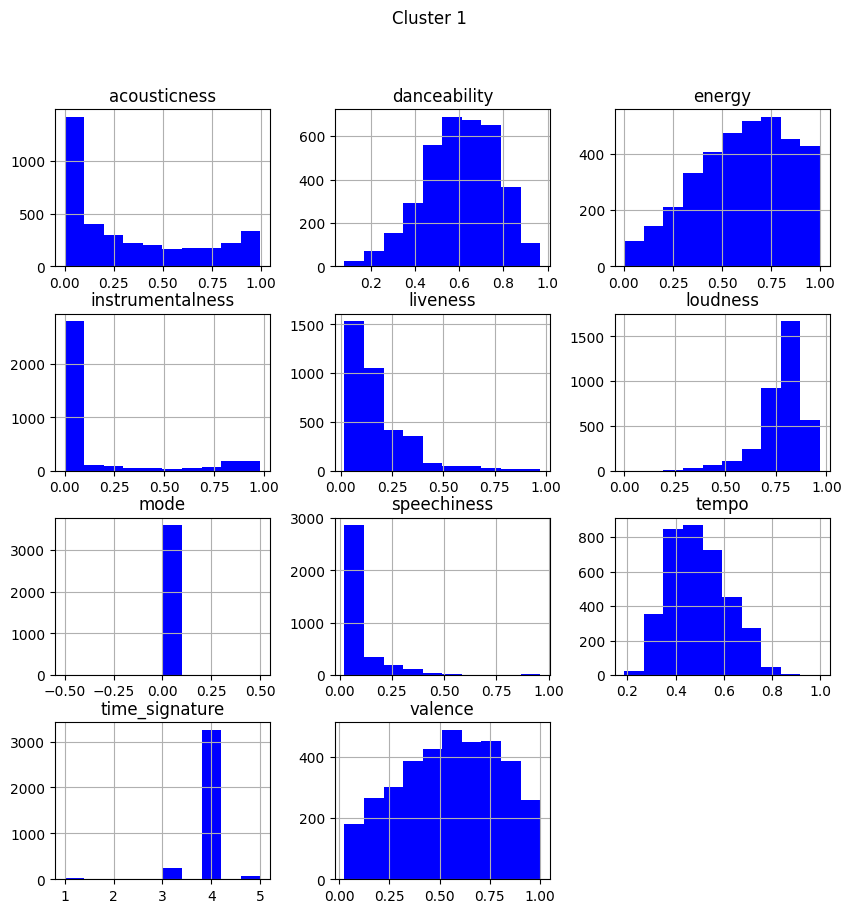

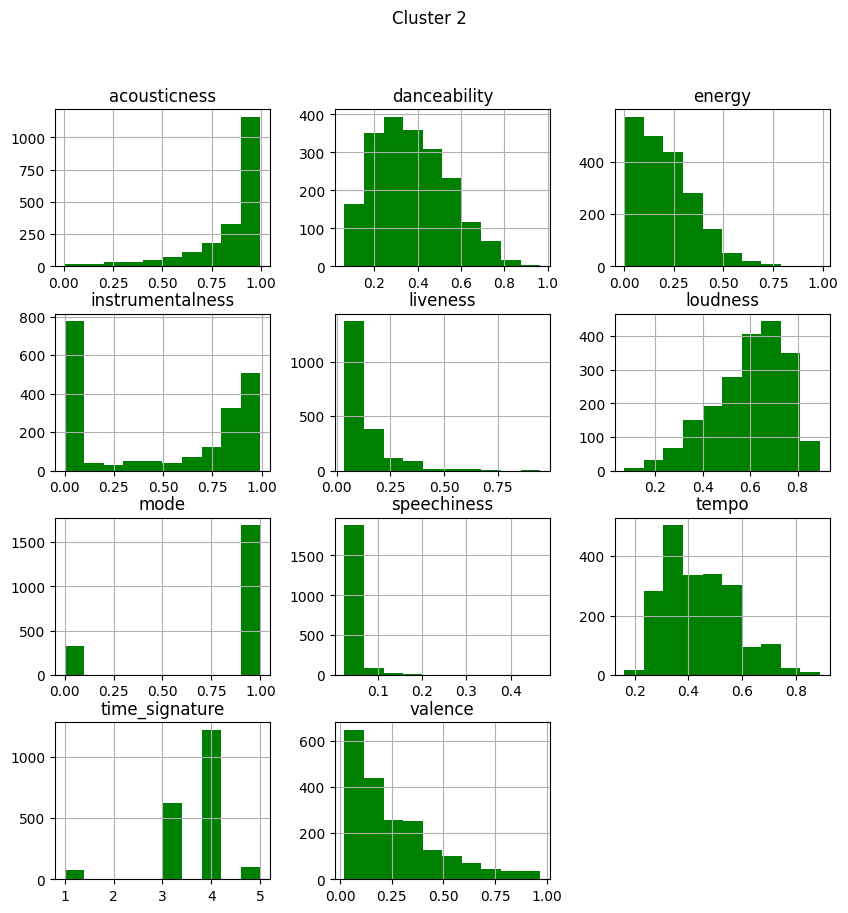

In [22]:
# Plot histogram for each feature in each cluster
plot_features = sub_df.drop(['clusters'], axis=1).columns
for k in range(0, 3):
    color = ['red', 'blue', 'green']
    sub_df[sub_df['clusters'] == k][plot_features].hist(figsize=(10,10), color=color[k])
    plt.suptitle('Cluster ' + str(k))

Investigate the difference between clusters

In [31]:
# TODO

Approach #2: Clustering using K-medoids